# Meditation competition

**Author**:

 - Borja Sánchez Leirado borja.sanchez.leirado@gmail.com | [@BorjaSanchez [in]](https://www.linkedin.com/in/borjasanlei/) | [@borjasanlei [Github]](https://github.com/borjasanlei)
---

_This code is Open Source, released under a GPL License._

**Victims**:


## Loading Bitbrain's .CSV EEG into a Pandas dataframe

We follow [**session0-importing-bitbrain-data-into-mne**](./session0-importing-bitbrain-data-into-mne.ipynb) to generate `mne.io.raw` object with EEG data.

In [3]:
import mne
import pandas as pd
import numpy as np

%matplotlib inline

In [9]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [21]:
def Bitbrain_to_raw(path, channels_list, sampling_rate):
    '''Loading Bitbrain's .CSV EEG into a mne.io.raw object'''
    
    df = pd.read_csv(path)
    df_mne = df.drop(['timestamp', 'sequence', 'battery', 'flags'], axis=1)

    '''Transpose'''
    data_mne = df_mne.to_numpy().transpose()

    '''Scale'''
    data_mne = data_mne / 1000000

    '''Raw info'''
    channels = channels_list
    info_mne = mne.create_info(ch_names=channels,ch_types='eeg',sfreq = sampling_rate)

    bbt_raw = mne.io.RawArray(data_mne, info_mne)
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    '''Final Raw object'''
    raw_1020 = bbt_raw.copy().set_montage(ten_twenty_montage)
    
    return raw_1020

def high_low_filter_notches(raw, fmin = 0.5, fmax = 100):
    
    fig = raw.plot_psd(fmin = 0, fmax = 200, average=False, tmin = 0, tmax = 250)
    
    raw.filter(l_freq = fmin, h_freq = fmax, )
    powerEEG = raw_1020.plot_psd(fmin = 0, fmax = 200, average=False, tmin = 0, tmax = 250)
    timeEEG = raw_1020.plot(start = 0., duration = 250., scalings=0.5e-3, remove_dc=True)
    
    pl_freq = 50. #Power-line freq (Spain = 50Hz)
    ny_freq = 128. #Nyquist freq 

    raw.notch_filter(np.arange(pl_freq, ny_freq, pl_freq), fir_design='firwin')
    powerEEG = raw_1020.plot_psd(fmin = 0, fmax = 200, average=False, tmin = 0, tmax = 250)
    timeEEG = raw_1020.plot(start = 0., duration = 250., scalings=0.5e-3, remove_dc=True)
    
    return raw_1020

def interpolate_bat_electrodes(raw_processed, bad_channels_list):
    
    raw_processed.info['bads'] = bad_channels_list
    
    print('Bad electrodes: ', raw_processed.info['bads'])
    raw_processed.interpolate_bads(reset_bads=False)
    
    return raw_1020

def epochs_around_events(raw_interpolated, criteria = 1.3e-4):
    
    events = mne.make_fixed_length_events(raw_interpolated, id = 333, duration = 1.)
    
    reject_criteria = dict(eeg = criteria)

    epochs = mne.Epochs(raw_interpolated, events, event_id = 333, tmin=-0.2, tmax=0.5,
                        reject=reject_criteria, preload=True)

    fig = epochs.plot(scalings=0.5e-4, block=True)
    
    epochs.plot_image()
    
    return epochs

def trial_rejection(raw_processed):
    
    %matplotlib notebook
    
    timeEEG = raw_processed.plot(start = 0., duration = 250., scalings=0.5e-3, remove_dc=True)
    timeEEG.canvas.key_press_event('a')
    
    

    
    
    
    

Creating RawArray with float64 data, n_channels=16, n_times=60712
    Range : 0 ... 60711 =      0.000 ...   237.152 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'T4', 'F8', 'M1', 'AF1', 'PO4', 'PO8', 'O10', 'AF7', 'FT10', 'TP10', 'FC6', 'PO3', 'CP5', 'Fz', 'FC5', 'PO6', 'T8', 'PO5', 'F7', 'O9', 'Oz', 'PO9', 'F5', 'P4', 'C5', 'C6', 'TP9', 'POz', 'P10', 'AF10', 'FC3', 'TP8', 'A1', 'P5', 'FC2', 'FC4', 'FCz', 'P3', 'P8', 'PO10', 'F1', 'P7', 'AF5', 'P6', 'Fpz', 'PO7', 'FT8', 'FT7', 'TP7', 'T7', 'AF4', 'FT9', 'T9', 'AF9', 'P1', 'AF6', 'Iz', 'CPz', 'AFz', 'PO2', 'FC1', 'A2', 'M2', 'F9', 'AF8', 'T5', 'CP6', 'AF2', 'T10', 'F6', 'F10', 'AF3', 'T3', 'PO1', 'P9', 'T6', 'P2', 'F2'}


<IPython.core.display.Javascript object>


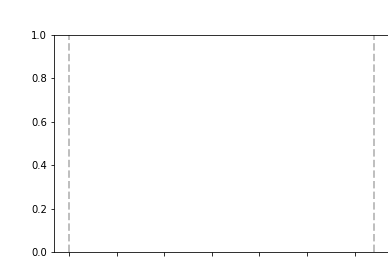

Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 1691 samples (6.605 sec)



<IPython.core.display.Javascript object>


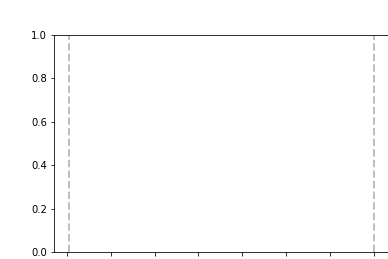

Effective window size : 8.000 (s)


<IPython.core.display.Javascript object>


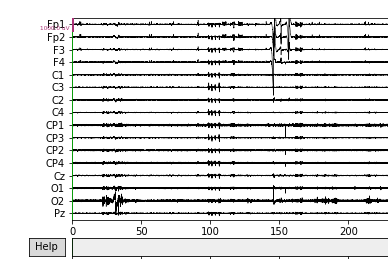

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



<IPython.core.display.Javascript object>


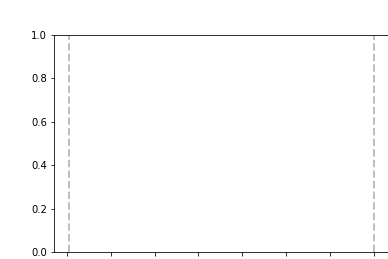

Effective window size : 8.000 (s)


<IPython.core.display.Javascript object>


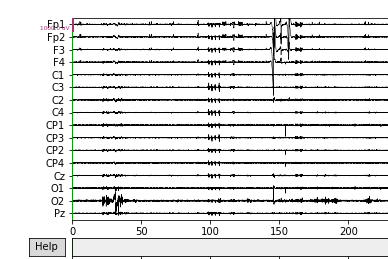

Bad electrodes:  ['O2']
Computing interpolation matrix from 15 sensor positions
Interpolating 1 sensors
237 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 237 events and 180 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F3', 'F4']
    Rejecting  epoch based on EEG : ['F4', 'C3', 'C2', 'C4', 'CP1', 'CP2', 'CP4', 'Cz', 'O1', 'Pz']
    Rejecting  epoch based on EEG : ['C3', 'C2', 'CP1', 'Cz', 'O1', 'Pz']
    Rejecting  epoch based on EEG : ['C3', 'C2', 'CP1', 'Cz', 'O1', 'Pz']
    Rejecting  epoch based on EEG : ['C3', 'C2', 'C4', 'CP1', 'Cz', 'O1', 'Pz']
    Rejecting  epoch based on EEG : ['O1', 'Pz']
    Rejecting  epoch based on EEG : ['O1', 'Pz']
    Rejecting  epoch based on EEG : ['C1', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'Cz', 'O1', 'Pz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4', 'CP1', 'Cz', 'O1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'C2', '

<IPython.core.display.Javascript object>


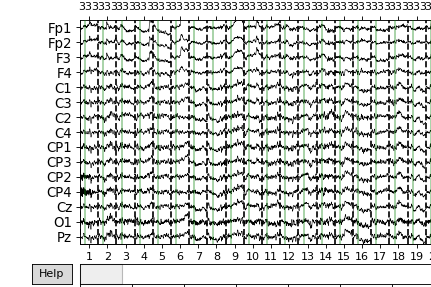

<IPython.core.display.Javascript object>


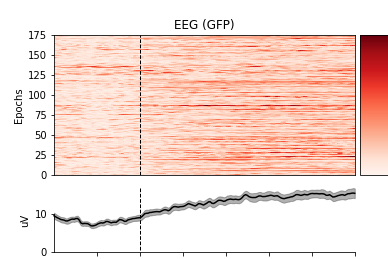

175 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"
Dropped 0 epochs
Channels marked as bad: ['O2']
Dropped 0 epochs
Channels marked as bad: ['O2']


<IPython.core.display.Javascript object>


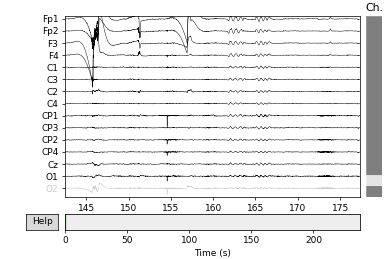

<IPython.core.display.Javascript object>


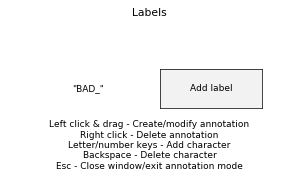

In [22]:
channels_list = ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']


raw_1020 = Bitbrain_to_raw("data/02-08-2020-jv-baseline-activity-no-labels-BBT-E16-AAA005-2020-02-08_12-59-21/EEG.csv", channels_list, 256)
raw_1020_filterd = high_low_filter_notches(raw_1020, fmin = 0.5, fmax = 70)
raw_1020_bad_electrodes = interpolate_bat_electrodes(raw_1020_filterd, ['O2'])
epochs = epochs_around_events(raw_1020_bad_electrodes, criteria = 1.3e-4)

trial_rejection(raw_1020_bad_electrodes)

In [14]:
'''Test'''
path = "data/02-08-2020-jv-baseline-activity-no-labels-BBT-E16-AAA005-2020-02-08_12-59-21/EEG.csv"
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']
sampling_rate = 256

In [15]:
rawBitbrain_to_raw(path, channels, sampling_rate)

Creating RawArray with float64 data, n_channels=16, n_times=60712
    Range : 0 ... 60711 =      0.000 ...   237.152 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'F10', 'C5', 'T4', 'PO4', 'M2', 'F9', 'AF5', 'T6', 'AFz', 'FT8', 'PO8', 'AF1', 'P10', 'P5', 'FC2', 'T10', 'T5', 'FC4', 'F1', 'PO5', 'AF3', 'P4', 'P9', 'TP9', 'Iz', 'P2', 'PO2', 'M1', 'AF4', 'FT7', 'P7', 'Oz', 'AF6', 'P3', 'A2', 'O10', 'POz', 'T8', 'PO1', 'PO3', 'O9', 'FT9', 'FC3', 'A1', 'C6', 'TP8', 'F7', 'F5', 'F6', 'AF9', 'PO10', 'AF8', 'Fz', 'P6', 'P8', 'CP5', 'AF2', 'PO6', 'F2', 'PO9', 'P1', 'AF7', 'FC6', 'TP10', 'T3', 'AF10', 'F8', 'TP7', 'Fpz', 'FC1', 'T7', 'PO7', 'FCz', 'FC5', 'CPz', 'T9', 'CP6', 'FT10'}


<RawArray  |  None, n_channels x n_times : 16 x 60712 (237.2 sec), ~7.5 MB, data loaded>